# 7月 1日 Python会


## 1.Pythonはタブでブロック{}を表現する

PythonはC言語でいうブロック{}がないので
タブでブロックを表現します。

C言語だと
```C
if(a == 1){
printf("a = 1 です\n");
}
```
Pythonの方には{}がない代わりにタブ(空白)でif文の中の処理ですよってことを表す。


In [24]:
if a == 1:
    print('a = 1です')

a = 1です


### 1.1 if文の例 タブでifの中かどうかをPythonは判断してる
以下のコードを実行してみると何が表示されるか

In [30]:
x = 10
if x == 0:
    print('in ifの中の処理です') #ifの中なので表示されない
    print('ここもifです') #ここもifの中なので実行されない
print('out ifの外の処理です') #ここはifの外なので実行される

out ifの外の処理です


上のコードは

> out ifの外の処理です

って表示される。

## 2.データの読み込み
``` Python
numpy.loadtxt(ファイル名,dtype=数値のタイプ,usecols = (列番号,列番号,列番号),skiprows = 行数,comments = `#`)
```
### 2.2 loadtextの引数について
* 第一引数はファイル名を。他のディレクトリにあっても良い。例 "../test.dat" 上のディレクトリにあるtest.datを読み込む
* dtypeには数値のタイプを float:浮動点小数 integer:整数
* usecolsの引数には欲しいデータの列番号を入れる。
* skiprows = 行数 この行にデータの読み込みの頭の行ををスキップ

### 2.3 ptdata.shape
shapeはその配列(データ)のサイズを出してくれる
> array.shape  
> ↓ output  
> (行数,列数)

### 2.4 コードの例 ↓

In [38]:
ptdata = np.loadtxt('Pt.dat',dtype='float',usecols = (0,1),comments ='#')
print(ptdata.shape)

(152, 2)


## 3 グラフの表示

### 3.1 グラフの表示の手順 
1. matplotlib.pyplot.figure関数でFigureオブジェクト
2. Figureオブジェクトのメソッド(.add_subplot, .add_axes)でAxesオブジェクトを作る。
3. Axesオブジェクトのメソッド(.plot, .imshowなど)にデータを渡しプロットをする。
4. 必要ならば、Axesオブジェクトのメソッド(.set_ylimなど)でプロットを調節する。

コードの説明は下に
### 3.2 コード ↓

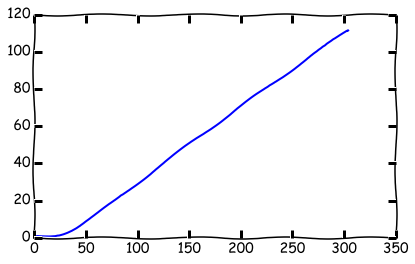

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd() #手書きっぽくグラフを表示する

fig = plt.figure(figsize = plt.figaspect((0.618)*1.0))
ax = fig.add_subplot(1,1,1)
ax.plot(ptdata[:,0],ptdata[:,1])

#plt.savefig('manga.png',dpi=150)



#### 3.2.1 初めてのmatplotlib
* magic function
```Python
%matplotlib inline
```
はnotebook内での画像の表示をするコマンド  
%から始まるコマンドはmagic functionっていうみたい 

* import
```Python
import matplotlib.pyplot as plt
```
こんな感じでmatplotlibをインポート

* figure 描画スペースを作る
```Python
fig = plt.figure(figsize = plt.figaspect((0.618)*1.0))
```
figureは空白のグラフ描画スペースを作りだす。

* add_subplot
```Python
add_subplot(1,1,1)
```
グラフを作ったスペース(ここではfig)に追加する。  
``add_subplot(行数,列数,何番目)``  
スペースfigを行数列数で分割してそのマスの何番目に配置するかを決める。 
例  
add_subplot(1,1,1) は1×1分割の1番目だからスペースいっぱいに配置  
add_subplot(2,2,2) は2×2分割の2番目に配置(グラフはスペースの1/4サイズになる)。
いろいろやってみるといいかもしれない。

#### 3.2.2 .plot() データのセット
```python
ax.plot(ptdata[:,0],ptdata[:,1])
```
.plot(x軸データ,y軸データ)
データは配列で一気に入れよう。
ptdata[:,0]
は0列目のすべてという意味。  
ptdataは152行2列の行列だが、ptdata[:,0]で0列目にある152個の数値を配列にしてx軸データとして格納している。

#### 3.2.3 画像の保存
```python
plt.savefig(ファイル名,dpi = 数値)
```
* dpi は解像度 多分指定しなくてもいい
